In [4]:
import numpy as np
import pygame

dataset = np.empty([0,2], dtype='f')

def createData(position):
    (x,y) = position
    r = np.random.uniform(0,R)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi),y + r*np.sin(phi)]
    global dataset
    dataset = np.append(dataset, [coord], axis=0)

R = 30
color = (0,0,255)
radius = 2
bg_color = (255,255,255)
(width,height) = (640,480)

screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("Dataset")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing and np.random.uniform(0,1)>.7:
        createData(pygame.mouse.get_pos())
            
    screen.fill(bg_color)
    for data in dataset:
        pygame.draw.circle(screen, color, (int(data[0]),int(data[1])), radius, 0)
    
    pygame.display.flip()
    
pygame.quit()

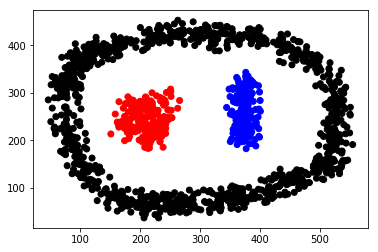

In [5]:
from  matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

colors = np.array(['black', 'red', 'blue', 'green', 'orange', 'pink', 'grey'])

pred = DBSCAN(eps=30, min_samples=2).fit_predict(dataset)

plt.figure()
plt.scatter(dataset[:,0], dataset[:,1], c=colors[pred])
plt.show()

In [6]:
A1 = {0:[1,2,3], 1:[4,5,6], 'abc':[7,8,9]}
A1['abc'][2]
A1[4] = [10,11,12]
A1

A2 = set()
A2.add(1)
A2.add(2)
A2.add(1)
A2.add((1,2))
A2

A3 = np.array([1,2,3])
list(A3)
tuple(A3)

(1, 2, 3)

3


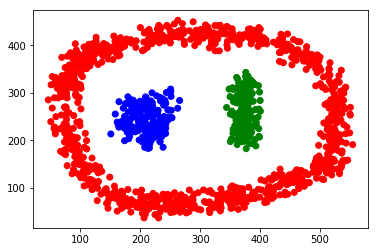

In [7]:
class DB_SCAN():
    def __init__(self, dataset, eps=30, min_samples=2):
        self.dataset = dataset
        self.eps = eps
        self.min_samples = min_samples
        self.n_clusters = 0
        self.clusters = {0:[]}
        self.visited = set()
        self.clustered = set()
        self.fitted = False        
        
    def get_dist2(self, list1, list2):
        return sum((i-j)**2 for i,j in zip(list1,list2))
    
    def get_neighbours(self, p):
        return [list(q) for q in self.dataset if self.get_dist2(p,q) < self.eps]
    
    def fit(self):
        for p in self.dataset:
            if tuple(p) in self.visited:
                continue
            self.visited.add(tuple(p))
            neighbours = self.get_neighbours(p)
            if len(neighbours) < self.min_samples:
                self.clusters[0].append(list(p))
            else:
                self.n_clusters += 1
                self.expand_cluster(p, neighbours)
        self.fitted = True
        print(self.n_clusters)
        
    def expand_cluster(self, p, neighbours):
        if self.n_clusters not in self.clusters:
            self.clusters[self.n_clusters] = []
        self.clustered.add(tuple(p))
        self.clusters[self.n_clusters].append(list(p))
        while neighbours:
            q = neighbours.pop()
            if tuple(q) not in self.visited:
                self.visited.add(tuple(q))
                q_neighbours = self.get_neighbours(q)
                if len(q_neighbours) > self.min_samples:
                    neighbours.extend(q_neighbours)
            if tuple(q) not in self.clustered:
                self.clustered.add(tuple(q))
                self.clusters[self.n_clusters].append(list(q))
                if q in self.clusters[0]:
                    self.clusters[0].remove(q)
                    
    def get_labels(self):
        labels = np.array([])
        if not self.fitted:
            self.fit()
        for p in self.dataset:
            for i in range(self.n_clusters+1):
                if list(p) in self.clusters[i]:
                    labels = np.append(labels, i).astype(int)
        return labels
                

test = DB_SCAN(dataset, 900, 2)
#test.get_neighbours(dataset[0])
#test.fit()
pred = test.get_labels()

plt.figure()
plt.scatter(dataset[:,0], dataset[:,1], c=colors[pred])
plt.show()

29
267
224
160
105
72
48
33
25
19
14
12
7
4
4
3
3
3
3
3


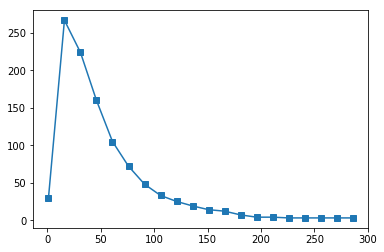

In [10]:
n_clusters = []
for k in range(20):
    test = DB_SCAN(dataset, 1 + k*15, 2)
    test.fit()
    n_clusters.append(test.n_clusters)
    if test.n_clusters == 1: break 
    
plt.plot([1 + k*15 for k in range(len(n_clusters))], n_clusters, marker='s')
plt.show()

In [83]:
A = (1,2)
B = [1,2]
A[1] = 3
B[1] = 3

TypeError: 'tuple' object does not support item assignment